# Function fitting using neural network

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from designBasis import *

## Data Generating

In [2]:
# Just enable only one of them!
# sine
ff = lambda t: np.sin(t)

# # piecewise function
# def ff(x):
#     conds = [x < 1, (x >= 1) & (x <= 2), x > 2]
#     funcs = [lambda x: x, lambda x: 1, lambda x: -2*x + 5.]
#     return np.piecewise(x, conds, funcs)

# # step function
# def ff(x):
#     conds = [x < 1, x >= 1]
#     funcs = [lambda x: 0, lambda x: 2.]
#     return np.piecewise(x, conds, funcs)

In [3]:
# Parameter settings.
[a, b] = [0.0, 2.0*np.pi]  # interval
n_hidden_nodes_max = 100
n_examples = 100    # the number of examples

In [4]:
t_train = np.linspace(a, b, n_examples, dtype = np.float32)
f_train = ff(t_train)

## Error vesus Width

In [5]:
nn = neuralnetwork()
errors = []
for n_hidden_nodes in range(n_hidden_nodes_max):
    slope, Z = constructZ(t_train, a, b, n_hidden_nodes)
    
    w1 = np.reshape(slope, (1,-1))
    b1 = np.ones((1, n_hidden_nodes))
    w2 = np.matmul(np.linalg.pinv(Z), f_train).reshape(-1, 1)
    
    nn.assign(w1, w2, b1)
    pred = nn.predict(t_train.reshape(-1,1))
    errors.append(np.linalg.norm(pred[0].T-f_train))

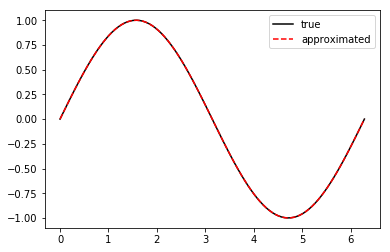

In [6]:
plt.figure()
plt.plot(t_train, f_train, 'k-', t_train, pred[0], 'r--', markersize = 1)
plt.legend(['true', 'approximated'], loc="upper right", ncol=1)
plt.show() # is necessary when running in terminal

In [7]:
print(errors[-1])

0.0007758494910554099


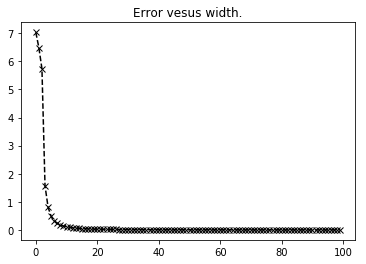

In [8]:
plt.figure()
plt.plot(range(n_hidden_nodes_max), errors, 'k--x')
plt.title('Error vesus width.')
plt.show() # is necessary when running in terminal